### Notebook to evaluate machine learning models for multi-text classification after cleaning twitter data 

In [2]:
#Dependencies
import pandas as pd
from sklearn.externals import joblib
import numpy as np

C:\ProgramData\Anaconda3\envs\tweetenv\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
fname = 'tweet_data/tweets_final_long_list_80k.csv'
df = pd.read_csv(fname, encoding='utf-8') 
df = df.loc[ : , ('Text_Clean','County')]
df.head()

df = df[pd.notnull(df['Text_Clean'])]
df = df[(df.County != 'None')].dropna()
df = df[(df.County != 'NAN')].dropna()

# Categorizing the counties

df['category_id'] = df['County'].factorize()[0]
category_id_df = df[['County', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'County']].values)
df.head(10)

,Text_Clean,County,category_id
0,talking to some great journos this morning all...,Greater London,0
1,incident severe delay m northbound between j a...,West Midlands,1
2,a little snippet from my sundayjazzcongregati...,Greater London,0
3,if youre a pharmaceutical professional in ma...,Greater Manchester,2
4,our day summit kicks off in our new office w...,Greater London,0
5,remembering charlotte bronte on the th anniver...,West Yorkshire,3
6,hell yeah x\r\r\nlook at you all posh o...,Greater London,0
7,hours to kill at london lhr in hounslow london,Greater London,0
8,heacham weather temp c amp is rising low c...,Norfolk,4
9,when life gives you lemon choux with meringue ...,Greater London,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65463 entries, 0 to 70652
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Text_Clean   65463 non-null  object
 1   County       65463 non-null  object
 2   category_id  65463 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [7]:
df.County.value_counts()

Greater London              17132
Greater Manchester           2571
Essex                        2114
West Yorkshire               2049
West Midlands                1589
                            ...  
Isles of Scilly                 5
Conwy                           4
Caerdydd                        4
Castell-nedd Port Talbot        2
Caerffili                       1
Name: County, Length: 159, dtype: int64

### Text Representation
The classifiers and learning algorithms can not directly process the text documents in their original form, as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length. 
Therefore, during the preprocessing step, the texts are converted to a more manageable representation.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=6, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Text_Clean).toarray()

labels = df.category_id

features.shape

(65463, 13122)

Here we use <b>chi-squared</b> within feature_selection to find the words that are the most correlated with each of the counties

This computes chi-squared stats between each non-negative feature and class and can be used to select the n_features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

In [16]:
from sklearn.feature_selection import chi2

N = 2

for county, category_id in sorted(category_to_id.items()):
    
        chi_features = chi2(features, labels == category_id)
        idx = np.argsort(chi_features[0])
    
        feature_names = np.array(tfidf.get_feature_names())[idx]
    
        unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
        bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    
#         print("# '{}':".format(county))
#         print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
#         print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Aberdeen City':
  . Most correlated unigrams:
. prezzo
. aberdeen
  . Most correlated bigrams:
. aberdeen aberdeen
. aberdeen city
# 'Aberdeenshire':
  . Most correlated unigrams:
. iamduphotmusic
. iambjornduphot
  . Most correlated bigrams:
. iambjornduphot iamduphotmusic
. mm forecast
# 'Angus council':
  . Most correlated unigrams:
. kirriemuir
. acdc
  . Most correlated bigrams:
. bst temperature
. wind humidity
# 'Antrim And Newtownabbey':
  . Most correlated unigrams:
. antrim
. newtownabbey
  . Most correlated bigrams:
. im good
. im house
# 'Ards And North Down':
  . Most correlated unigrams:
. northernireland
. toe
  . Most correlated bigrams:
. country park
. recommend retail
# 'Argyll and Bute Council':
  . Most correlated unigrams:
. mull
. islay
  . Most correlated bigrams:
. drive home
. gorgeous weather
# 'Armagh City, Banbridge And Craigavon':
  . Most correlated unigrams:
. peoples
. banbridge
  . Most correlated bigrams:
. dont look
. yes good
# 'Bath and North Ea

# 'Gwynedd':
  . Most correlated unigrams:
. whr
. porthmadog
  . Most correlated bigrams:
. porthmadog ukweather
. ukweather wind
# 'Hampshire':
  . Most correlated unigrams:
. winchester
. hampshire
  . Most correlated bigrams:
. winchester hampshire
. new forest
# 'Hartlepool':
  . Most correlated unigrams:
. dominos
. hartlepool
  . Most correlated bigrams:
. nowplaying dominos
. demo hartlepool
# 'Herefordshire':
  . Most correlated unigrams:
. hereford
. herefordshire
  . Most correlated bigrams:
. hourly weather
. hereford tnc
# 'Hertfordshire':
  . Most correlated unigrams:
. stalbans
. harpenden
  . Most correlated bigrams:
. business marketing
. stalbans harpenden
# 'Highland Council':
  . Most correlated unigrams:
. highlands
. inverness
  . Most correlated bigrams:
. baro mb
. rain hum
# 'Inverclyde':
  . Most correlated unigrams:
. awe
. ma
  . Most correlated bigrams:
. felt good
. falling rain
# 'Isle of Anglesey':
  . Most correlated unigrams:
. anglesey
. holyhead
  . 

# 'Somerset':
  . Most correlated unigrams:
. horsehour
. somerset
  . Most correlated bigrams:
. min ave
. oat dew
# 'South Ayrshire Council':
  . Most correlated unigrams:
. racecourse
. ayr
  . Most correlated bigrams:
. walking dog
. day races
# 'South Gloucestershire':
  . Most correlated unigrams:
. disney
. walt
  . Most correlated bigrams:
. bristol avon
. disney world
# 'South Lanarkshire':
  . Most correlated unigrams:
. kilbride
. woofwoofwednesday
  . Most correlated bigrams:
. east kilbride
. south lanarkshire
# 'South Yorkshire':
  . Most correlated unigrams:
. doncaster
. sheffield
  . Most correlated bigrams:
. inn doncaster
. nowplaying beverley
# 'Southampton':
  . Most correlated unigrams:
. mooring
. southampton
  . Most correlated bigrams:
. nowplaying shooting
. shooting star
# 'Southend-on-Sea':
  . Most correlated unigrams:
. yoga
. southend
  . Most correlated bigrams:
. sea southend
. southend sea
# 'Staffordshire':
  . Most correlated unigrams:
. cannock
. st

### Comparing different classification models

In this part, we test 4 different classification models for accuracy
- Naive Bayes
- Linear SVC
- Logistic Regression
- Random Forest


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

<b> Splitting the data in Train (2/3) and Test (1/3) </b> 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df['Text_Clean'], df['County'], test_size=0.33, random_state = 42)

# For word vectorization
vect_count = CountVectorizer()

X_train_counts = vect_count.fit_transform(X_train)

# To Transform a count matrix to a normalized tf or tf-idf representation 
# Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency.

tfidf_tr = TfidfTransformer()

X_train_tfidf = tfidf_tr.fit_transform(X_train_counts)

In [11]:
# Comparing 4 models
%time

models = [
    RandomForestClassifier(n_estimators=200, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
        cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

Wall time: 0 ns


C:\ProgramData\Anaconda3\envs\tweetenv\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\ProgramData\Anaconda3\envs\tweetenv\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\ProgramData\Anaconda3\envs\tweetenv\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\ProgramData\Anaconda3\envs\tweetenv\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\ProgramData\Anaconda3\envs\tweetenv\lib\site-

<b> Plotting the accuracy for the models..<b>

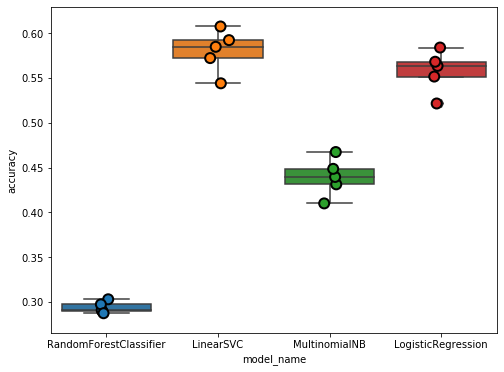

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, size=10, jitter=True, edgecolor="black", linewidth=2)

plt.show()

In [14]:
# The mean accuracy for each of the models

cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.580175
LogisticRegression        0.557750
MultinomialNB             0.439362
RandomForestClassifier    0.293631
Name: accuracy, dtype: float64

### Comment: LinearSVC seems to be the most accurate model!!

We will use Calibrated SVC to show the probabilities distribution for each label (county)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.calibration import CalibratedClassifierCV


counties = df['County']
text = df['Text_Clean']

X_train, X_test, y_train, y_test = train_test_split(text, counties, random_state=0, test_size=0.3)

count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)

tf_transformer = TfidfTransformer().fit(X_train_counts)

X_train_transformed = tf_transformer.transform(X_train_counts)

X_test_counts = count_vect.transform(X_test)

X_test_transformed = tf_transformer.transform(X_test_counts)


labels = LabelEncoder()

y_train_labels_fit = labels.fit(y_train)

y_train_labels_trf = labels.transform(y_train)

print(f' This are the counties: {labels.classes_}')



 This are the counties: ['Aberdeen City' 'Aberdeenshire' 'Angus council' 'Antrim And Newtownabbey'
 'Ards And North Down' 'Argyll and Bute Council'
 'Armagh City, Banbridge And Craigavon' 'Bath and North East Somerset'
 'Bedford' 'Belfast' 'Blackburn with Darwen' 'Blackpool' 'Blaenau Gwent'
 'Borough of Halton' 'Bracknell Forest' 'Bridgend County Borough'
 'Brighton and Hove' 'Buckinghamshire' 'Caerdydd'
 'Caerphilly County Borough' 'Cambridgeshire' 'Cardiff' 'Carmarthenshire'
 'Castell-nedd Port Talbot' 'Causeway Coast and Glens'
 'Central Bedfordshire' 'Ceredigion' 'Cheshire East'
 'Cheshire West and Chester' 'City of Bristol' 'Clackmannanshire' 'Conwy'
 'Conwy Principal Area' 'Cornwall' 'County Durham' 'Cumbria' 'Darlington'
 'Denbighshire' 'Derby' 'Derbyshire' 'Derry And Strabane' 'Devon' 'Dorset'
 'Dumfries and Galloway' 'Dundee City Council' 'East Ayrshire Council'
 'East Dunbartonshire Council' 'East Lothian Council'
 'East Renfrewshire Council' 'East Riding of Yorkshire' 'East 

In [16]:
linear_svc = LinearSVC()
clf = linear_svc.fit(X_train_transformed, y_train_labels_trf)

calibrated_svc = CalibratedClassifierCV(base_estimator=linear_svc,cv="prefit")

calibrated_svc.fit(X_train_transformed,y_train_labels_trf)
predicted = calibrated_svc.predict(X_test_transformed)

### Saving Models

In [17]:
from sklearn.externals import joblib
# save classifier
model_filename = 'saved_models/svc_classifier.pkl'
joblib.dump(calibrated_svc, model_filename) 

# save transformer
transformer_filename = 'saved_models/svc_transf.pkl'
joblib.dump(tf_transformer, transformer_filename) 

# save count_vect
counter_filename = 'saved_models/svc_counter.pkl'
joblib.dump(count_vect, counter_filename) 

#save labels
labels_filename = 'saved_models/county_labels.pkl'
joblib.dump(labels, labels_filename)

['saved_models/county_labels.pkl']

### Testing Predictions

In [18]:
to_predict = ["Dublin is great"]

p_count = count_vect.transform(to_predict)
p_tfidf = tf_transformer.transform(p_count)


# print('Average accuracy on test set={}'.format(np.mean(predicted == labels.transform(y_test))))
print('Predicted probabilities')
print(calibrated_svc.predict_proba(p_tfidf))

Predicted probabilities
[[1.78584339e-05 1.41184946e-06 1.43135404e-05 1.12601126e-05
  2.62638758e-05 8.80434920e-05 5.25638777e-06 1.18825769e-04
  1.39950744e-04 1.51360691e-03 8.97553355e-06 4.48701027e-05
  2.52080876e-04 2.53804436e-04 1.73639924e-05 2.95820250e-05
  2.38618217e-02 2.19799977e-04 2.22437017e-05 6.32599868e-05
  8.79001352e-04 4.83207549e-04 2.84266627e-05 2.19067083e-05
  1.34683958e-04 1.49764070e-04 1.17913664e-05 9.02473697e-01
  2.13082929e-05 5.41838761e-04 1.88681909e-05 4.25212989e-05
  7.55555608e-05 3.69048649e-04 6.19879134e-04 3.93817947e-04
  2.74248718e-04 6.65707973e-05 3.25825093e-05 1.39778950e-06
  5.45763986e-05 3.85698465e-04 6.95093274e-04 2.60564867e-05
  3.48907962e-04 3.92103431e-06 6.31103217e-06 6.85889506e-05
  4.33912485e-05 1.37296992e-05 2.53513403e-04 2.21552889e-03
  6.53567389e-04 4.55725538e-05 3.37704269e-05 1.38005263e-04
  1.90042130e-05 1.33415432e-04 3.77409701e-04 7.03343930e-03
  1.36971420e-03 5.24634491e-05 1.48140836e-02

In [19]:
results = pd.DataFrame(calibrated_svc.predict_proba(p_tfidf)*100, columns=labels.classes_).transpose()
results.sort_values(0, ascending = False).head(10).to_json()

'{"0":{"Cheshire East":90.2473697053,"Brighton and Hove":2.3861821726,"West Midlands":1.558456125,"Hampshire":1.4814083552,"Greater London":0.7033439296,"West Yorkshire":0.614003496,"Edinburgh":0.2215528894,"South Yorkshire":0.2147010551,"Belfast":0.1513606911,"Greater Manchester":0.13697142}}'

In [20]:
print(results)

                                0
Aberdeen City            0.001786
Aberdeenshire            0.000141
Angus council            0.001431
Antrim And Newtownabbey  0.001126
Ards And North Down      0.002626
...                           ...
Wokingham                0.002840
Worcestershire           0.011449
Wrexham Principal Area   0.071450
Ynys Môn                 0.002248
York                     0.007757

[158 rows x 1 columns]


## Loading svc model and testing

In [21]:
from sklearn.externals import joblib
import pandas as pd

from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder()

#model
model_filename = 'saved_models/svc_classifier.pkl' 

#transformer
transformer_filename = 'saved_models/svc_transf.pkl'

#count_vect
counter_filename = 'saved_models/svc_counter.pkl'

# Conty labels
labels_filename = 'saved_models/county_labels.pkl'

labels = joblib.load(labels_filename)
tf = joblib.load(transformer_filename)
count = joblib.load(counter_filename)

clf = joblib.load(model_filename)
clf

CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight=None,
                                                dual=True, fit_intercept=True,
                                                intercept_scaling=1,
                                                loss='squared_hinge',
                                                max_iter=1000,
                                                multi_class='ovr', penalty='l2',
                                                random_state=None, tol=0.0001,
                                                verbose=0),
                       cv='prefit', method='sigmoid')

In [22]:
texts = ["Dublin from Sutton this afternoon ⁦@PhotosOfDublin #Dublin #Ireland #sunset",
         "rain today, AGAIN, This weather sucks",
         "I hope to live long enough to see the back of #Brexit",]

text_count = count.transform(texts)
text_features = tf.transform(text_count)
# predictions = clf.predict_proba(text_features)
predictions = pd.DataFrame(clf.predict_proba(text_features)*100, columns=labels.classes_).transpose()

In [23]:
predictions.sort_values(0, ascending = False).head(10).to_json()

'{"0":{"Cheshire East":57.3805739361,"Hampshire":30.3255834149,"Greater London":5.7011815427,"West Midlands":3.9304768219,"Edinburgh":0.7485260746,"Brighton and Hove":0.3668082925,"Norfolk":0.1488137697,"Greater Manchester":0.1208989684,"West Yorkshire":0.0969242741,"Belfast":0.0833989808},"1":{"Cheshire East":0.0891605437,"Hampshire":0.0028249665,"Greater London":4.4443994613,"West Midlands":5.0841424783,"Edinburgh":1.7524904804,"Brighton and Hove":0.8215699641,"Norfolk":0.6624879904,"Greater Manchester":8.2037151837,"West Yorkshire":0.7585221496,"Belfast":0.1999394535},"2":{"Cheshire East":0.0012934151,"Hampshire":0.0387300502,"Greater London":89.4822160899,"West Midlands":0.2958264835,"Edinburgh":0.826674051,"Brighton and Hove":0.0085432488,"Norfolk":0.0718407096,"Greater Manchester":0.414983203,"West Yorkshire":2.020110268,"Belfast":0.089256637}}'

In [25]:
predictions.sort_values(0, ascending = False).head(10)

,0,1,2
Cheshire East,57.380574,0.089161,0.001293
Hampshire,30.325583,0.002825,0.038730
Greater London,5.701182,4.444399,89.482216
West Midlands,3.930477,5.084142,0.295826
Edinburgh,0.748526,1.752490,0.826674
Brighton and Hove,0.366808,0.821570,0.008543
Norfolk,0.148814,0.662488,0.071841
Greater Manchester,0.120899,8.203715,0.414983
West Yorkshire,0.096924,0.758522,2.020110
Belfast,0.083399,0.199939,0.089257
